# Part-I: GDP Analysis of the Indian States

## Part I-A:

In this exercise we will try to understand
* Which states have been growing consistently fast, and which ones have been struggling?

* Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

* The top 5 and the bottom 5 states based on total GDP for 2015-16

## _Which states have been growing consistently fast, and which ones have been struggling?_

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df_main = pd.read_csv("C:/Users/Chandan Singh/Downloads/GDP-20190612T180919Z-001/GDP/GDP-Statewise.csv")

In [309]:
df_main.head(5)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [310]:
df=df_main.loc[(df_main["Items  Description"]=='(% Growth over previous year)') & ((df_main["Duration"]=='2013-14')|(df_main["Duration"]=='2014-15')|(df_main["Duration"]=='2015-16'))]


In [311]:
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


### Determining which states showed consitent growth and GDP and which states struggled

In [312]:
df_states = df.drop("All_India GDP",axis=1)  #States only
states=df_states.columns[2:]  #Contains names of the states
growthIn1314=df_states.iloc[0,2:].values  #Growth in 2013-14
growthIn1415=df_states.iloc[1,2:].values  #Growth in 2014-15
growthIn1516=df_states.iloc[2,2:].values  #Growth in 2015-16

### Ploting year wise %GDP increase for each state

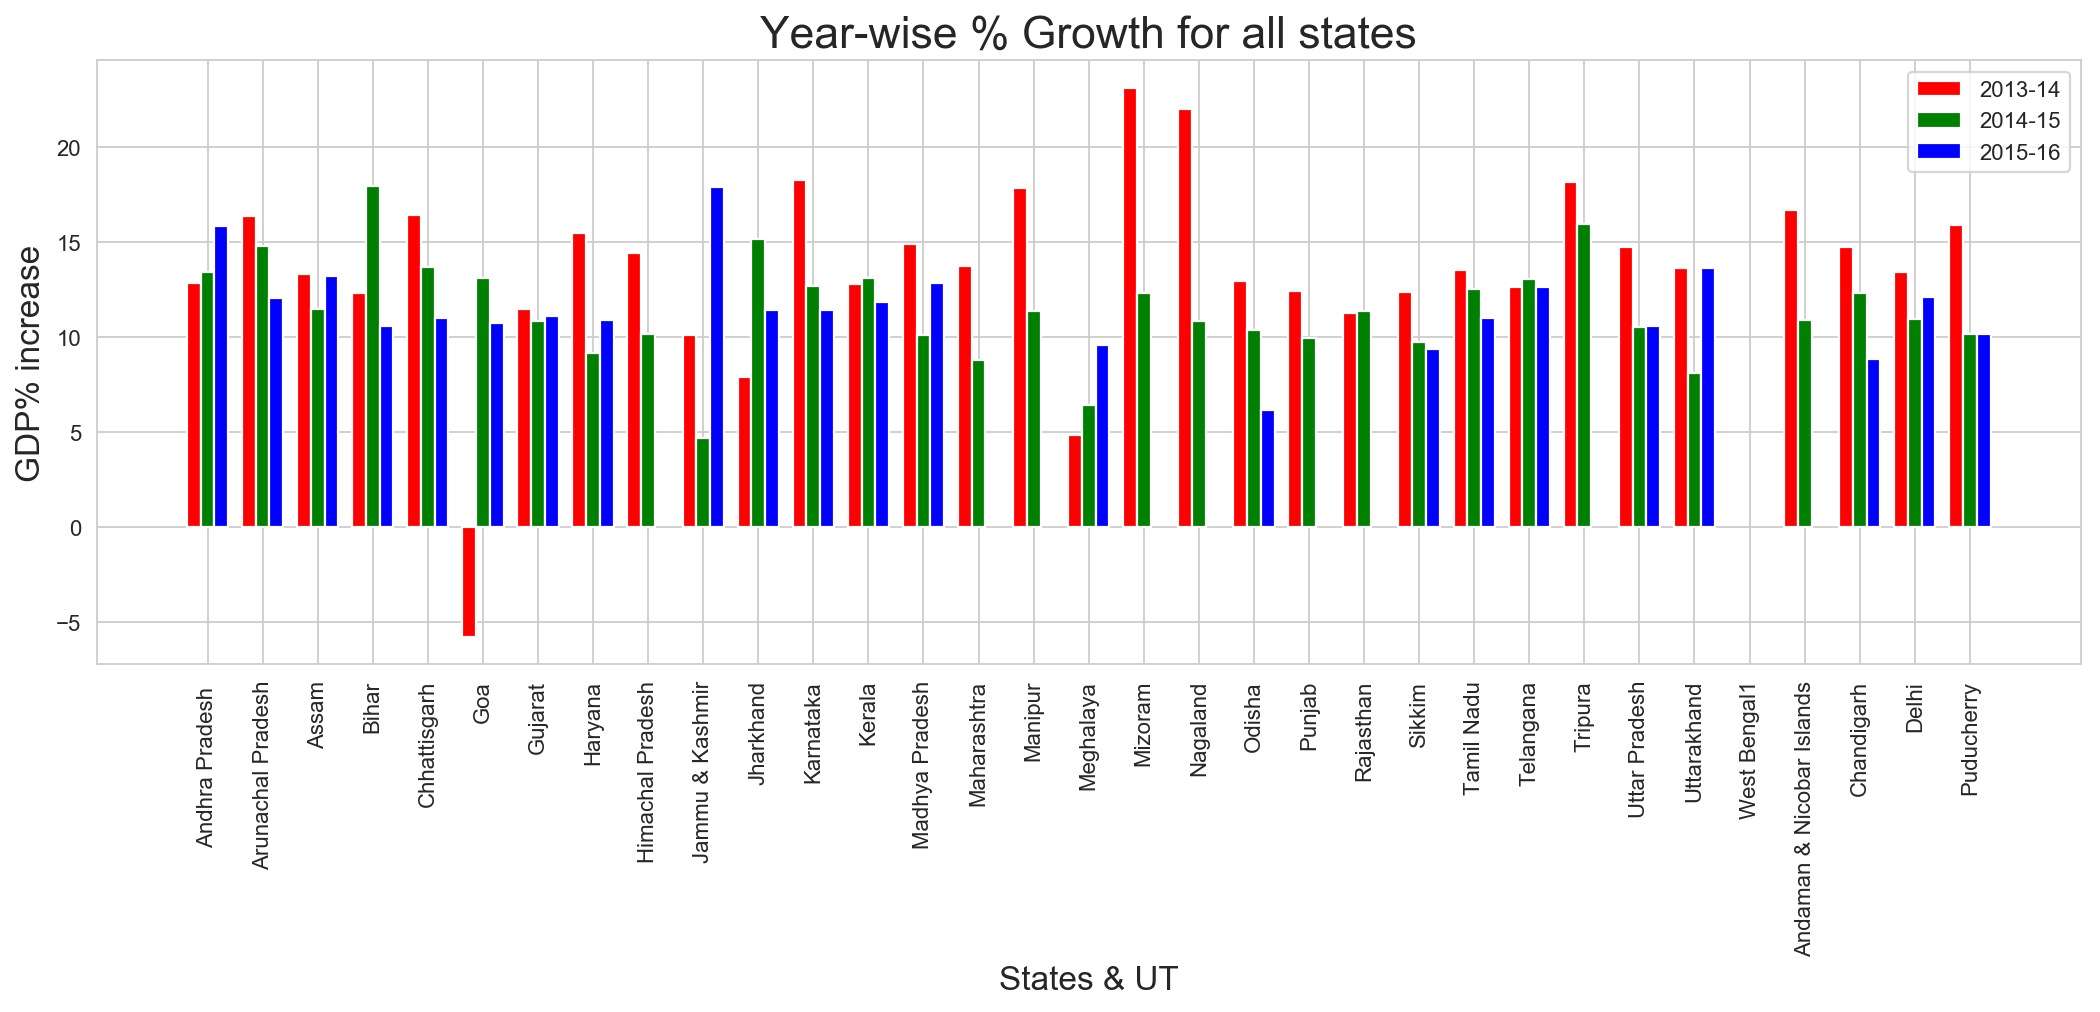

In [313]:
N = len(states)
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure(figsize=(16,5),dpi=160)

ax = fig.add_subplot(111)

yvals = growthIn1314
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = growthIn1415
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = growthIn1516
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('GDP% increase',fontsize=15)
ax.set_xlabel('States & UT',fontsize=15)
ax.set_xticks(ind+width)
ax.set_xticklabels(states,rotation=90)
ax.legend( (rects1[0], rects2[0], rects3[0]), ('2013-14', '2014-15', '2015-16') )
plt.title("Year-wise % Growth for all states",fontsize=20)
plt.show()

Here we can see
For each year the GDP percentange is getting increased of Andhra Pradesh & Meghalaya (as positive slope is there for these states).

States like Arunachal Pradesh, Chattisgarh,Karnataka,Goa, Odisha, Tamil Nadu,Haryana,UttarPradesh & Chandigarh are showing negative slope it means the GDP percentage is getting decreased with years.

And states like Assam, Gujrat, Kerla, Sikkim, Telangana are showing neutral growth.

### Plotting Statewise Average %Growth over previous year for 2013-16

Text(0.5, 1.0, 'State-Wise average GDP')

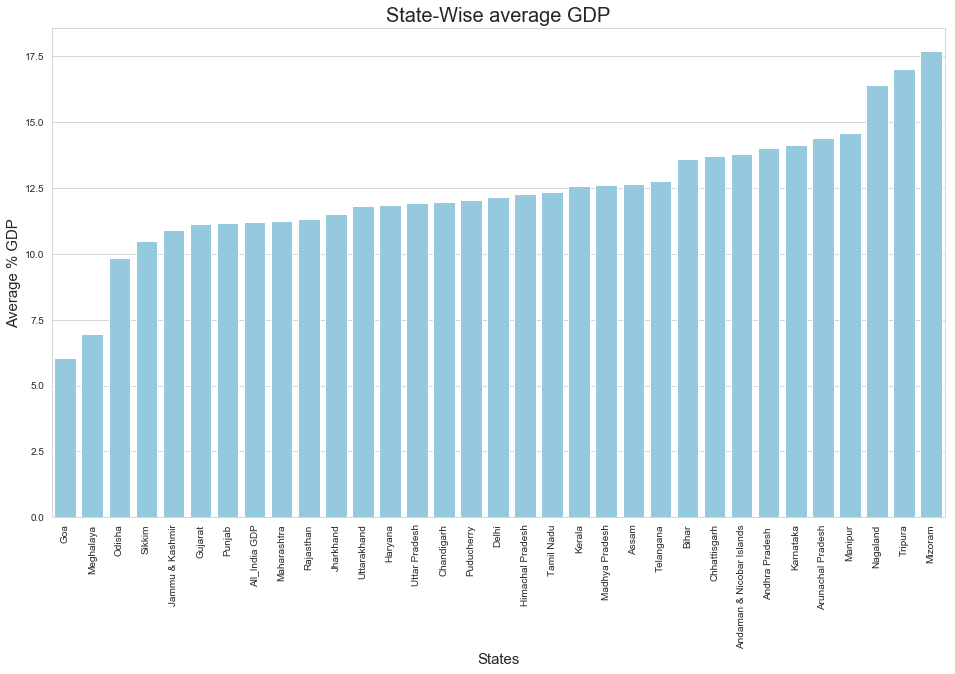

In [314]:
mean_gdp_df=df.loc[(df["Items  Description"]=='(% Growth over previous year)') & ((df["Duration"]=='2013-14')|(df["Duration"]=='2014-15')|(df["Duration"]=='2015-16'))].groupby('Items  Description').mean()

mean_gdp_df=mean_gdp_df.dropna(axis=1,how='all')  #For removing NaN valued states
mean_gdp_df_states = mean_gdp_df.drop("All_India GDP",axis=1)
plt.figure(figsize=(16,9))
sns.set_style("whitegrid")
sns.barplot(data=mean_gdp_df.sort_values(by = '(% Growth over previous year)', axis=1),color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Average % GDP",fontsize=15 )
plt.xlabel("States",fontsize=15)
plt.title("State-Wise average GDP",fontsize=20)



Now if we consider the both plots we can conclude Goa is struggling for sure.
But we cannot say Mizoram is the best performing state, because we don't have data for 2015-16.
Similarly Tripura,Mizoram,Nagaland and Manipur gets rulled out as data is missing for a year.

So the best performing state here will Arunachal Pradesh as it has data for each year.

## _Curiosity exercise : Comparing average growth rate of Bihar and India_

Text(0.5, 1.0, 'State-Wise average GDP')

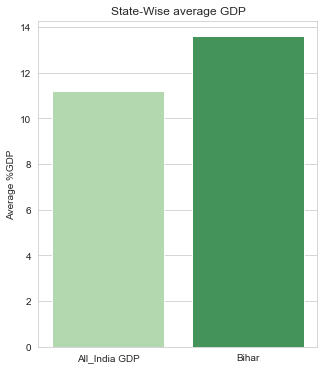

In [315]:
plt.figure(figsize=(5,6))
sns.set_style("whitegrid")
sns.barplot(data=mean_gdp_df[['Bihar','All_India GDP']].sort_values(by = '(% Growth over previous year)', axis=1),palette="Greens")
#plt.xticks(rotation=9)
plt.ylabel("Average %GDP")
#plt.xlabel("States")
plt.title("State-Wise average GDP")

We can clearly see, Bihar's average GDP growth is better than India'GDP combined.

## _Identifying the top 5 and the bottom 5 states based on total GDP (2015-16)_

In [316]:
tot_gdp = df_main[(gdp_sw_df['Items  Description']!='(% Growth over previous year)') & (gdp_sw_df['Duration']=='2015-16')]
tot_gdp=tot_gdp.drop('Duration', axis=1)
tot_gdp=tot_gdp.drop('All_India GDP', axis=1)
tot_gdp=tot_gdp.set_index('Items  Description').sort_values(by='GSDP - CURRENT PRICES (` in Crore)',axis=1)

Text(0.5, 1.0, 'Total GDP 2015-16')

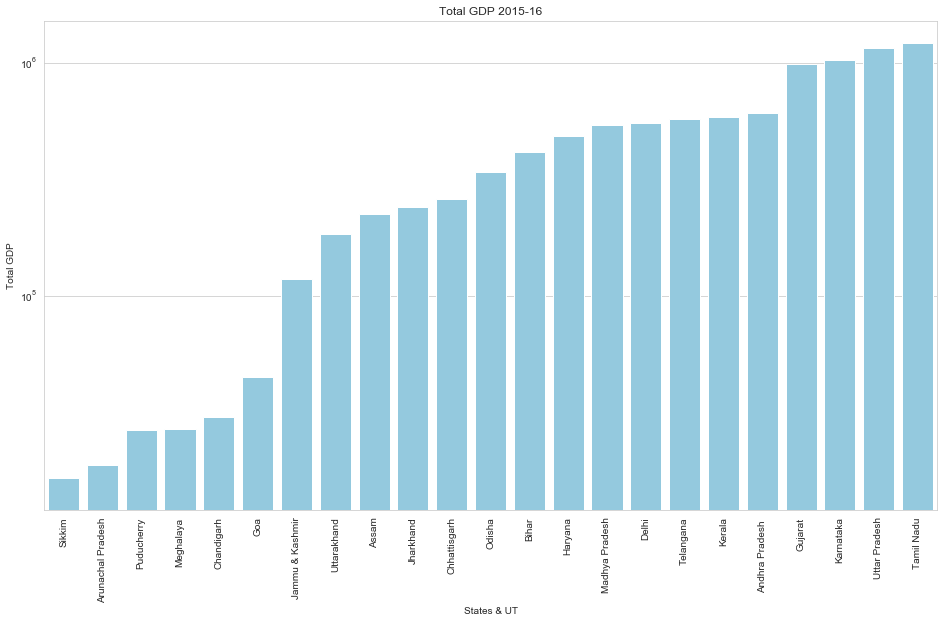

In [317]:
plt.figure(figsize=(16,9))
plt.yscale('log')
plt.xticks(rotation=90)
g=sns.barplot(data=tot_gdp.dropna(axis=1),color='skyblue')
plt.ylabel("Total GDP")
plt.xlabel("States & UT")
plt.title('Total GDP 2015-16')


Clearly we can see in 2015-16, the top 5 performing states are Andhra Pradesh, Gujarat, Karnatka, Uttar Pradesh and Tamil Nadu
and the worst performing states/UTs are Sikkim, Arunanchal Pradesh, Puducherry, Meghalaya and Chandigarh

## Part I-B:

In this part we will try to find
* The top 5 and the bottom 5 states based on the GDP per capita.
* The ratio of the highest per capita GDP to the lowest per capita GDP.
* The percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.
* Categorizing states in C1,C2,C3 and C4 and finding out the top sub sectors in each category.

### _Let's find out the top 5 and the bottom 5 states based on the GDP per capita._

In [318]:
#Making data ready for the analysis
import os

path = r"C:\Users\Chandan Singh\Downloads\GDP-20190612T180919Z-001\GDP\States"
files = os.listdir(path)

masterDf = pd.DataFrame({'Item': [],
                    'State': [],
                    '2014-15': []})

for file in files:
    p = path+"\\"+file
    df = pd.read_csv(p,encoding='iso-8859-1')
    df['State'] = file.split('-')[1].replace('_','')
    df = df[['Item','State','2014-15']]
    df.set_index('Item')
    masterDf = pd.concat([df,masterDf])


In [319]:
#Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the centre, not state governments.
UT = ['Delhi','Chandigarh','AndamanNicobar','Puducherry']
df = masterDf[~masterDf.State.isin(UT)]

In [320]:
#For GDP per capita
df_gdp_perCap = df[df.Item=='Per Capita GSDP (Rs.)']

Text(0.5, 1.0, 'State-Wise per Capita Total GDP')

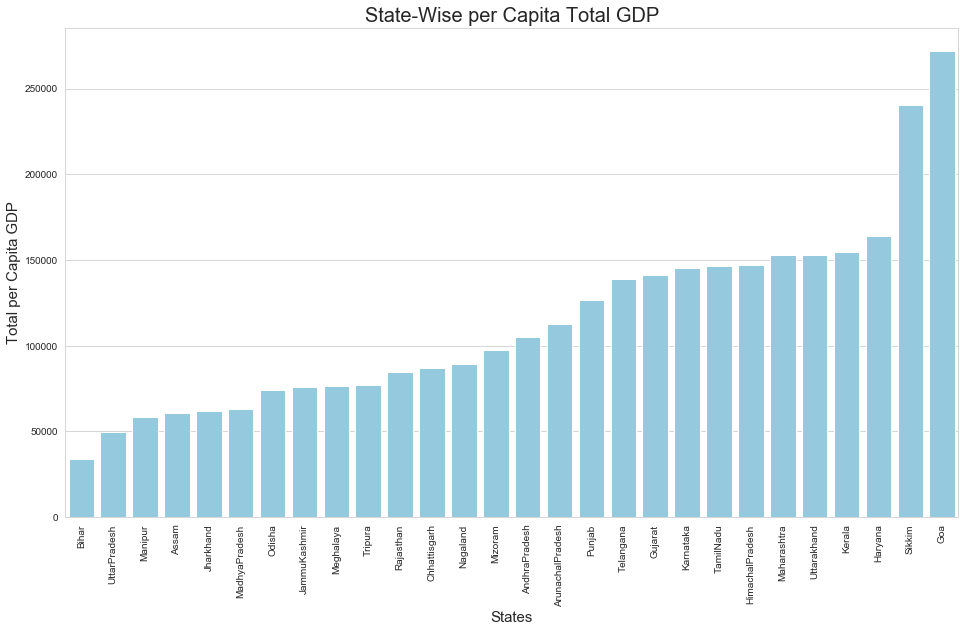

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9))
sns.set_style("whitegrid")
sns.barplot(x='State',y='2014-15',data=df_gdp_perCap.sort_values('2014-15'),color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Total per Capita GDP",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.title("State-Wise per Capita Total GDP",fontsize=20)

**Top 5 states based on GDP per capita** Goa, Haryana, Uttrakhand, Kerala and Sikkim

**Bottom 5 states based on GDP per capita** Bihar, UttarPradesh, Manipur, Assam, Jharkhand

### _Ratio of the highest per capita GDP to the lowest per capita GDP_

In [322]:
round(df_gdp_perCap['2014-15'].max()/df_gdp_perCap['2014-15'].min(),2)

8.0

### _Ploting the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states combined._

In [323]:
df_pst = df.pivot_table(values='2014-15',index='Item',aggfunc='sum').loc[['Primary','Secondary','Tertiary']]
df_pst

,2014-15
Item,
Primary,218077590.0
Secondary,287398113.0
Tertiary,512056980.0


<function matplotlib.pyplot.show(*args, **kw)>

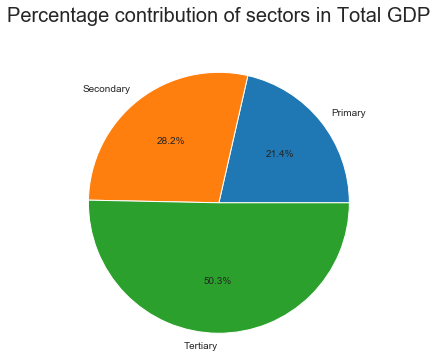

In [324]:

plt.title("Percentage contribution of sectors in Total GDP\n\n\n", fontsize=20)
plt.pie(x=df_pst,labels=['Primary','Secondary','Tertiary'],radius=1.5,autopct='%1.1f%%')
plt.show

### _Let try to see the distribution for each state_

In [325]:
df_pst_states=df.pivot_table(values='2014-15',index='State',aggfunc='sum',columns = 'Item')[['Primary','Secondary','Tertiary']]
df_pst_states['Primary%'] = df_pst_states['Primary']*100/(df_pst_states['Primary']+df_pst_states['Secondary']+df_pst_states['Tertiary'])
df_pst_states['Secondary%'] = df_pst_states['Secondary']*100/(df_pst_states['Primary']+df_pst_states['Secondary']+df_pst_states['Tertiary'])
df_pst_states['Tertiary%'] = df_pst_states['Tertiary']*100/(df_pst_states['Primary']+df_pst_states['Secondary']+df_pst_states['Tertiary'])



df_pst_states=df_pst_states.drop(['Primary','Secondary','Tertiary'],axis=1)
df_pst_states

Item,Primary%,Secondary%,Tertiary%
State,,,
AndhraPradesh,33.391777,21.482371,45.125852
ArunachalPradesh,43.816079,17.569541,38.614379
Assam,28.535525,21.605578,49.858897
Bihar,22.163956,16.539778,61.296265
Chhattisgarh,28.795566,37.064548,34.139886
Goa,8.675354,43.012417,48.312229
Gujarat,20.077045,41.732691,38.190264
Haryana,20.187664,31.538827,48.273510
HimachalPradesh,15.798276,42.028603,42.173121


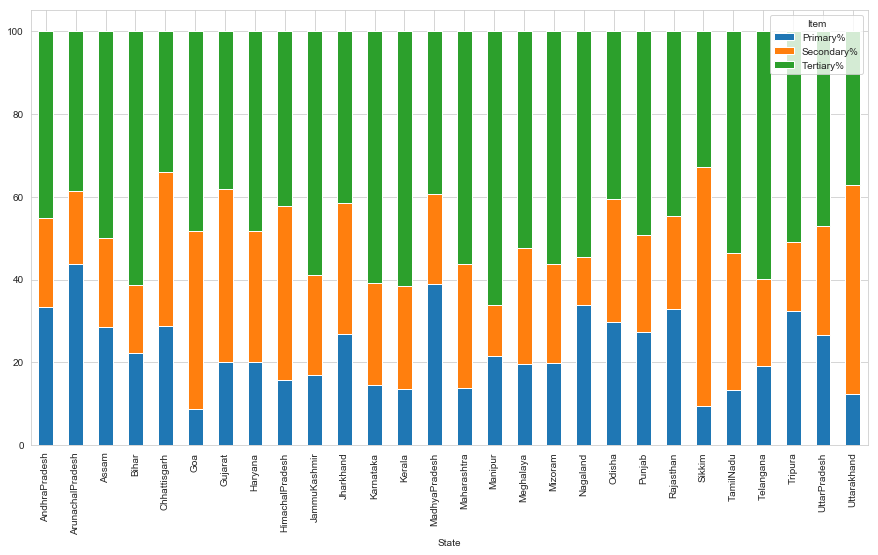

In [326]:

df_pst_states.plot.bar(stacked=True,figsize = (15,8))

plt.show()

Clearly we can see for each state, the Tertiary sector is contributing the most followed Secondary and then Primary

### _Let's categorize the states into four groups based on the GDP per capita (C1, C2, C3, C4)._

Because we have many states here and it would be very handy if we can categorize the states into 4 categories

In [327]:
df_perCapita=df[df['Item']=='Per Capita GSDP (Rs.)']
df_quantile=df_perCapita.quantile([.2,.5,.85,1])
df_quantile

,2014-15
0.20,67385.00
0.50,101332.00
0.85,153064.85
1.00,271793.00


In [350]:
def cal_category(x):
    if x<=float(df_quantile.loc[0.20]):
        return 'C4'
    elif x<=float(df_quantile.loc[0.50]):
        return 'C3'
    elif x<=float(df_quantile.loc[0.85]):
        return 'C2'
    elif x<=float(df_quantile.loc[1.00]):
        return 'C1'
    
df_perCapita['Category'] = df_perCapita['2014-15'].apply(lambda x:cal_category(x))

In [329]:
df_perCapita.sort_values(by='Category')

,Item,State,2014-15,Category
32,Per Capita GSDP (Rs.),Uttarakhand,153076.0,C1
32,Per Capita GSDP (Rs.),Goa,271793.0,C1
32,Per Capita GSDP (Rs.),Haryana,164077.0,C1
32,Per Capita GSDP (Rs.),Sikkim,240274.0,C1
32,Per Capita GSDP (Rs.),Kerala,154778.0,C1
32,Per Capita GSDP (Rs.),Maharashtra,152853.0,C2
32,Per Capita GSDP (Rs.),Gujarat,141263.0,C2
32,Per Capita GSDP (Rs.),HimachalPradesh,147330.0,C2
32,Per Capita GSDP (Rs.),Karnataka,145141.0,C2
32,Per Capita GSDP (Rs.),ArunachalPradesh,112718.0,C2


In [349]:
df_GDP_perCap = df
df_GDP_perCap['Category'] = df_GDP_perCap['State'].apply(lambda x:list(df_perCapita[df_perCapita.State==x].Category)[0])
df_GDP_perCap

,Item,State,2014-15,Category
0,"Agriculture, forestry and fishing",UttarPradesh,25097754.0,C4
1,Crops,UttarPradesh,16215212.0,C4
2,Livestock,UttarPradesh,7096876.0,C4
3,Forestry and logging,UttarPradesh,1404936.0,C4
4,Fishing and aquaculture,UttarPradesh,380730.0,C4
5,Mining and quarrying,UttarPradesh,901501.0,C4
6,Primary,UttarPradesh,25999255.0,C4
7,Manufacturing,UttarPradesh,12261649.0,C4
8,"Electricity, gas, water supply & other utility...",UttarPradesh,2030625.0,C4
9,Construction,UttarPradesh,11256450.0,C4


In [331]:
df_GDPsec = df_GDP_perCap[~df_GDP_perCap.Item.isin(['Primary','Secondary','Tertiary','Per Capita GSDP (Rs.)',"Population ('00)",
                     'Crops','Trade & repair services','Hotels & restaurants','Livestock','Forestry and logging',
                      'Fishing and aquaculture','Railways','Road transport','Water transport','Air transport','Road transport*',
                      'Road transport**','Trade & repair services*',
'Services incidental to transport','Storage','Communication & services related to broadcasting','TOTAL GSVA at basic prices',
'Taxes on Products','Subsidies on products'])]
df_GDPsec =df_GDPsec.groupby(['Category','Item'])['2014-15'].sum()
df_GDPsec

Category  Item                                                                
C1        Agriculture, forestry and fishing                                        15993232.0
          Construction                                                             12607184.0
          Electricity, gas, water supply & other utility services                   2434878.0
          Financial services                                                        4321519.0
          Gross State Domestic Product                                            118129206.0
          Manufacturing                                                            19625045.0
          Mining and quarrying                                                       833510.0
          Other services                                                            9042352.0
          Public administration                                                     4150701.0
          Real estate, ownership of dwelling & professional services       

Till here we have categorized each states based on the quantiles (0.20,0.5, 0.85, 1).
Now let us find top sub sectors in each category

### _Finding top sub-sectors that contributes apx 80% in GSDP in each category_

### For C1 Category states

In [332]:
Gsdp=df_GDPsec.C1.loc["Gross State Domestic Product"]
df_GDPsecC1=pd.DataFrame(df_GDPsec.C1)
df_GDPsecC1['%Contribution']=df_GDPsecC1['2014-15'].apply(lambda x:round((x/gsdp)*100,2))
df_GDPsecC1=df_GDPsecC1.drop(['Gross State Domestic Product'])
df_GDPsecC1 = df_GDPsecC1.sort_values(by="%Contribution",ascending=False)
df_GDPsecC1['RunningTotal'] = df_GDPsecC1['%Contribution'].cumsum(axis=0)
df_GDPsecC1 = df_GDPsecC1[round(df_GDPsecC1['RunningTotal'])<=81]
df_GDPsecC1

,2014-15,%Contribution,RunningTotal
Item,,,
Manufacturing,19625045.0,16.61,16.61
"Agriculture, forestry and fishing",15993232.0,13.54,30.15
"Trade, repair, hotels and restaurants",15738265.0,13.32,43.47
"Real estate, ownership of dwelling & professional services",15571552.0,13.18,56.65
Construction,12607184.0,10.67,67.32
Other services,9042352.0,7.65,74.97


Text(0.5, 1.0, 'Contributions of Sub-Category for C1 states')

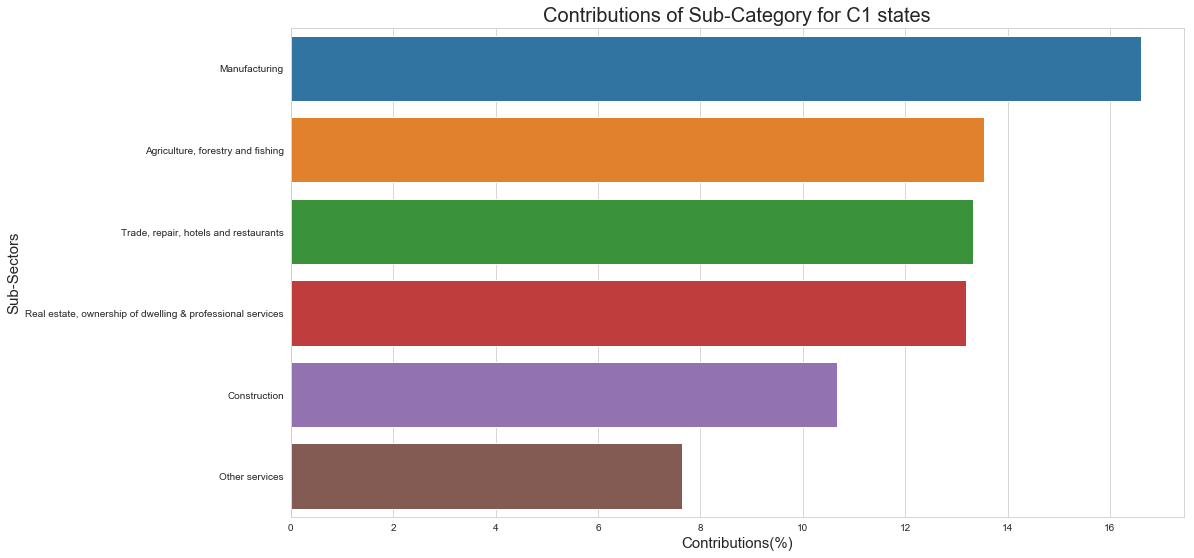

In [333]:
plt.figure(figsize=(16,9))
sns.barplot(y=df_GDPsecC1.index,x='%Contribution',data=df_GDPsecC1.sort_values(by='%Contribution',ascending=False))
plt.xlabel("Contributions(%)",fontsize=15)
plt.ylabel("Sub-Sectors",fontsize=15)
plt.title("Contributions of Sub-Category for C1 states", fontsize=20)

### The top 3 sub sectors for C1 states are 
* Manufacturing
* Agriculture, forestry and fishing
* Trade, repair, hotels and restaurants

In manufacturing C1 states are already doing well. These states can focus more Trade, repair, hotels and restaurants and on Construtions. If these states are able to attract tourists by constructing beautiful places, both sub-sectors can grow mutually. 

### For C2 Category states

In [334]:
Gsdp=df_GDPsec.C2.loc["Gross State Domestic Product"]

df_GDPsecC2=pd.DataFrame(df_GDPsec.C2)

df_GDPsecC2['%Contribution']=df_GDPsecC2['2014-15'].apply(lambda x:round((x/Gsdp)*100,2))
df_GDPsecC2=df_GDPsecC2.drop(['Gross State Domestic Product'])

df_GDPsecC2 = df_GDPsecC2.sort_values(by="%Contribution",ascending=False)
df_GDPsecC2['RunningTotal'] = df_GDPsecC2['%Contribution'].cumsum(axis=0)
df_GDPsecC2 = df_GDPsecC2[round(df_GDPsecC2['RunningTotal'])<=81]
df_GDPsecC2

,2014-15,%Contribution,RunningTotal
Item,,,
Manufacturing,108002544.0,17.34,17.34
"Real estate, ownership of dwelling & professional services",95695548.0,15.36,32.70
"Agriculture, forestry and fishing",88427015.0,14.20,46.90
"Trade, repair, hotels and restaurants",63729156.0,10.23,57.13
Construction,43975718.0,7.06,64.19
Other services,39486616.0,6.34,70.53
Financial services,37812475.0,6.07,76.60


Text(0.5, 1.0, 'Contributions of Sub-Category for C2 states')

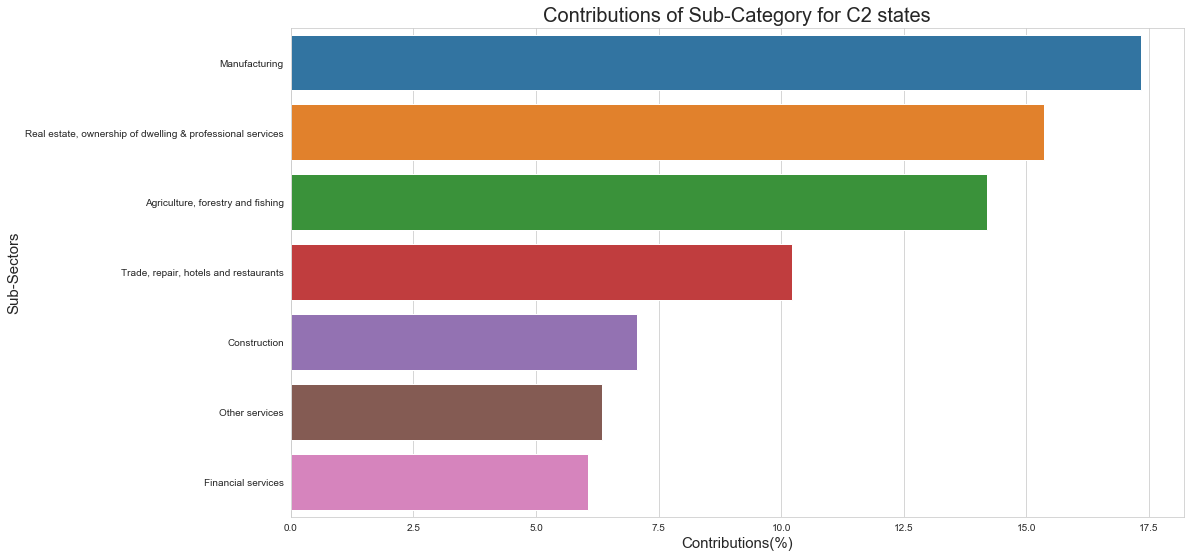

In [335]:
plt.figure(figsize=(16,9))
sns.barplot(y=df_GDPsecC2.index,x='%Contribution',data=df_GDPsecC2.sort_values(by='%Contribution',ascending=False))
plt.xlabel("Contributions(%)",fontsize=15)
plt.ylabel("Sub-Sectors",fontsize=15)
plt.title("Contributions of Sub-Category for C2 states", fontsize=20)

### The top 3 sub sectors for C2 states are 
* Manufacturing
* Real estate, ownership of dwelling & professional services	
* Agriculture, forestry and fishing

These states are lagging in Constrution and in Agriculture, forestry and fishing. States can motivate people to build their career in Agro fields. Now a days organic foods is on boom. So people can start working on these fields to enhance the GDP of the states.

### For C3 Category states

In [336]:
Gsdp=df_GDPsec.C3.loc["Gross State Domestic Product"]

df_GDPsecC3=pd.DataFrame(df_GDPsec.C3)

df_GDPsecC3['%Contribution']=df_GDPsecC3['2014-15'].apply(lambda x:round((x/Gsdp)*100,2))
df_GDPsecC3=df_GDPsecC3.drop(['Gross State Domestic Product'])

df_GDPsecC3 = df_GDPsecC3.sort_values(by="%Contribution",ascending=False)
df_GDPsecC3['RunningTotal'] = df_GDPsecC3['%Contribution'].cumsum(axis=0)
df_GDPsecC3 = df_GDPsecC3[round(df_GDPsecC3['RunningTotal'])<=81]
df_GDPsecC3

,2014-15,%Contribution,RunningTotal
Item,,,
"Agriculture, forestry and fishing",28994177.0,21.42,21.42
Manufacturing,18259272.0,13.49,34.91
"Trade, repair, hotels and restaurants",13901840.0,10.27,45.18
"Real estate, ownership of dwelling & professional services",13158791.0,9.72,54.90
Construction,11828535.0,8.74,63.64
Other services,9546854.0,7.05,70.69
Mining and quarrying,9385092.0,6.93,77.62


Text(0.5, 1.0, 'Contributions of Sub-Category for C3 states')

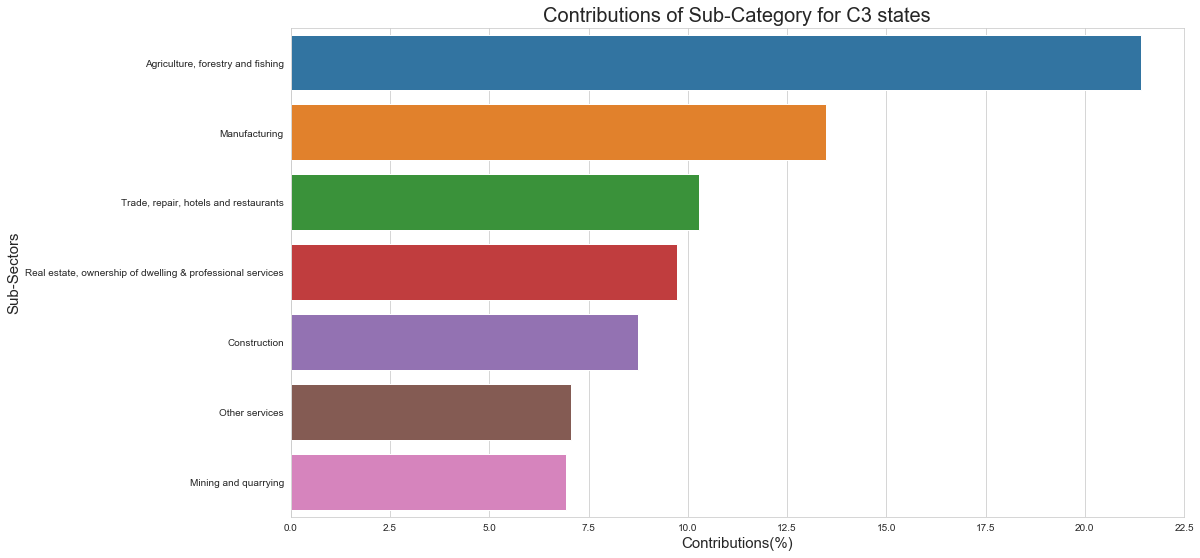

In [337]:
plt.figure(figsize=(16,9))
sns.barplot(y=df_GDPsecC3.index,x='%Contribution',data=df_GDPsecC3.sort_values(by='%Contribution',ascending=False))
plt.xlabel("Contributions(%)",fontsize=15)
plt.ylabel("Sub-Sectors",fontsize=15)
plt.title("Contributions of Sub-Category for C3 states", fontsize=20)

### The top 3 sub sectors for C3 states are 
* Agriculture, forestry and fishing
* Manufacturing	
* Trade, repair, hotels and restaurants

These states can work on their Manufacturing sub sector to do even better. As we have C1,C2 states which are already doing better in this sector. C3 states can get help from those states to learn and do the same to themselves.


These states should encourage youth to get proper education so that they can become skilled worker and contribute in Real estate, ownership of dwelling & professional services	sector.

Tourist attraction can also be planned if possible. Because it may help in increasing the Trade, repair, hotels and restaurants sectors.

### And for C4 Category states

In [338]:
Gsdp=df_GDPsec.C4.loc["Gross State Domestic Product"]

df_GDPsecC4=pd.DataFrame(df_GDPsec.C4)

df_GDPsecC4['%Contribution']=df_GDPsecC4['2014-15'].apply(lambda x:round((x/Gsdp)*100,2))
df_GDPsecC4=df_GDPsecC4.drop(['Gross State Domestic Product'])

df_GDPsecC4 = df_GDPsecC4.sort_values(by="%Contribution",ascending=False)
df_GDPsecC4['RunningTotal'] = df_GDPsecC4['%Contribution'].cumsum(axis=0)
df_GDPsecC4 = df_GDPsecC4[round(df_GDPsecC4['RunningTotal'])<=81]
df_GDPsecC4

,2014-15,%Contribution,RunningTotal
Item,,,
"Agriculture, forestry and fishing",56735044.0,24.32,24.32
"Trade, repair, hotels and restaurants",27484595.0,11.78,36.10
Manufacturing,24987032.0,10.71,46.81
"Real estate, ownership of dwelling & professional services",24177534.0,10.37,57.18
Construction,22775948.0,9.76,66.94
"Transport, storage, communication & services related to broadcasting",16191800.0,6.94,73.88
Other services,15859015.0,6.80,80.68


Text(0.5, 1.0, 'Contributions of Sub-Category for C4 states')

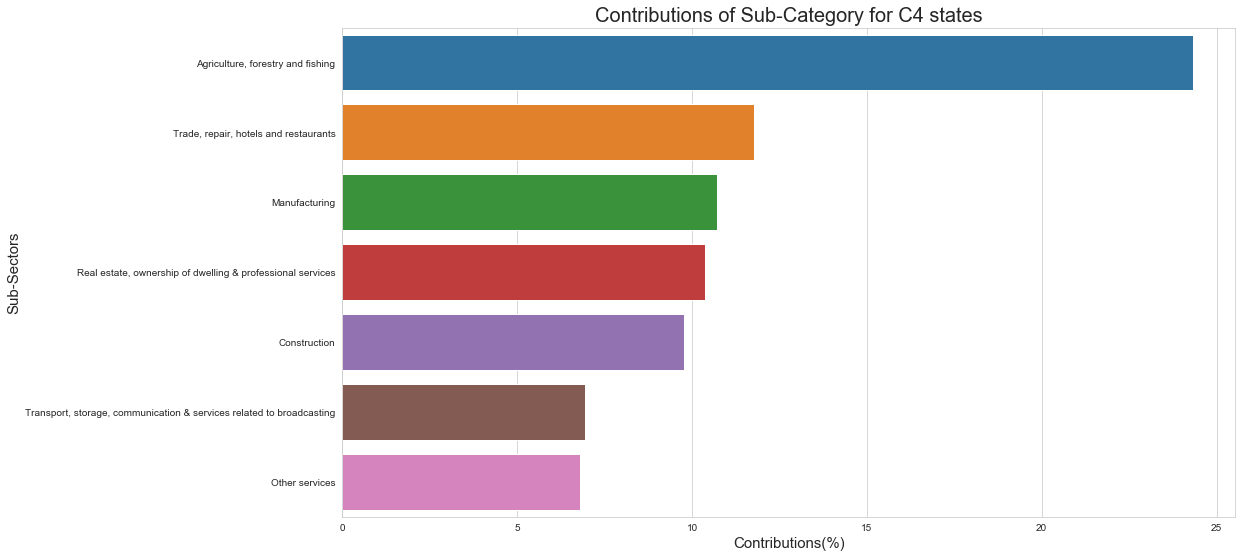

In [339]:
plt.figure(figsize=(16,9))
sns.barplot(y=df_GDPsecC4.index,x='%Contribution',data=df_GDPsecC4.sort_values(by='%Contribution',ascending=False))
plt.xlabel("Contributions(%)",fontsize=15)
plt.ylabel("Sub-Sectors",fontsize=15)
plt.title("Contributions of Sub-Category for C4 states", fontsize=20)

### The top 3 sub sectors for C4 states are 
* Agriculture, forestry and fishing
* Trade, repair, hotels and restaurants
* Manufacturing

C4 category in the category where we can see lots of opportunites to work on like Transport, storage, communication & services related to broadcasting. This sector can be increased by educating people about the technologies and how they can help them. If the use of these services increases, this sector will also grow.

Here also education plays an important role. More the educated people, more the skilled workers and more growth in Real estate, ownership of dwelling & professional services sector

These states can get help from other states to work on it's Manufacturing sector.

## Summary:
Here we have looked how the Sub Categories contribution varies for the different categories of states. Below are the insights we can draw from the above plots:
1. Manufacturing contributed significantly good in C1 and C2 states but for C3 and C4 the contribution is less. C3 and C4 states can concentrate more the Manufacturing sectors in order to enhance their GDPs
2. Agriculture, forestry and fishing are the sectors which contributes more in C3 and C4 states but not in C1 and C2 states. States should motivate people in Agriculture field in C1 and C2 states.
3. Manufacturing and Real estate, ownership of dwelling & professional services	are highly correlated with the GDP for the states.
4. Construction and Other services have a good opportunity where the state can grow.
5. States should focus more Tertiary and Secondary sectors to increase their GDP

# Part-II: GDP and Education Dropout Rates:

In this part we will try to find the correaltion between Per Capita GDP and drop outs rates.

In [340]:
gdp_per_capita = masterDf[masterDf.Item=='Per Capita GSDP (Rs.)']
gdp_per_capita=gdp_per_capita.drop("Item",axis=1)

In [341]:
#Reading the Drop out file
df_drop_out = pd.read_csv("C:/Users/Chandan Singh/Downloads/GDP-20190612T180919Z-001/GDP/Statewise-annual-dropout.csv")
df_drop_out=df_drop_out[["Level of Education - State","Primary - 2014-2015.1","Upper Primary - 2014-2015","Secondary - 2014-2015"]].dropna(axis=0)

#To match the Drop out columns to the GDP data columns
df_drop_out=df_drop_out.rename(index=str, columns={"Level of Education - State": "State"})
df_drop_out['State'] = df_drop_out['State'].apply(lambda x:x.replace(" ",''))
df_drop_out = df_drop_out.set_index('State').rename(index={'A&NIslands':'AndamanNicobar'}) #Renaming...
df_drop_out

,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015
State,,,
AndamanNicobar,0.51,1.69,9.87
AndhraPradesh,6.72,5.20,15.71
ArunachalPradesh,10.82,6.71,17.11
Assam,15.36,10.51,27.06
Chhatisgarh,2.91,5.85,21.26
Dadra&NagarHaveli,1.47,4.02,16.77
Daman&Diu,1.11,3.11,32.27
Goa,0.73,0.07,11.15
Gujarat,0.89,6.41,25.04


In [342]:
#Once the data is aligned we can merge them.
df_merged = pd.merge(df_drop_out,gdp_per_capita,how='inner',on='State')
df_merged = df_merged.rename(columns = {'2014-15':'Per Capita GDP'})

df_merged['Category'] = df_merged['Per Capita GDP'].apply(lambda x:cal_category(x))
df_merged = df_merged.sort_values(by='Category')
df_merged

,State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GDP,Category
20,Sikkim,2.27,1.57,15.89,240274.0,C1
4,Goa,0.73,0.07,11.15,271793.0,C1
17,Puducherry,0.37,0.56,12.19,175701.0,C1
6,Haryana,5.61,5.81,15.89,164077.0,C1
0,AndamanNicobar,0.51,1.69,9.87,138858.0,C2
21,Telangana,2.08,2.30,15.53,139035.0,C2
18,Punjab,3.05,3.22,8.86,126606.0,C2
9,Karnataka,2.02,3.85,26.18,145141.0,C2
11,Maharashtra,1.26,1.79,12.87,152853.0,C2
7,HimachalPradesh,0.64,0.87,6.07,147330.0,C2


#### Trying to find state-wise correlation between GDP per capita with Drop out rates

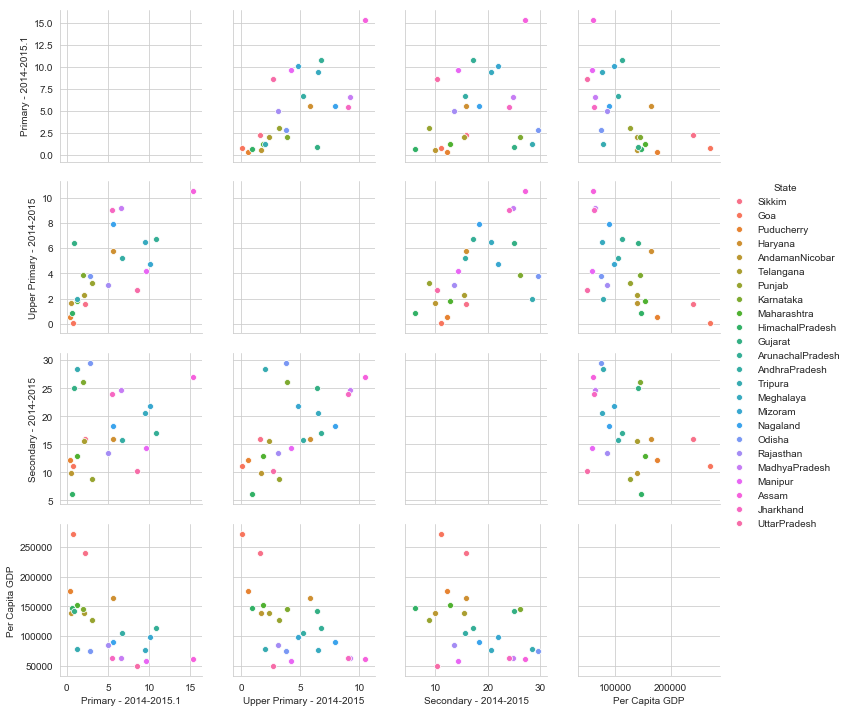

In [348]:
sns.pairplot(df_merged, hue='State')
#plt.title("State wise Correlation between Drop out and Per Capita GDP")
plt.show()

It is tough to read this plot as there are many states. We can use categories instead of states to understand better.

### Finding Category-wise correlation between GDP per capita with Drop out rates

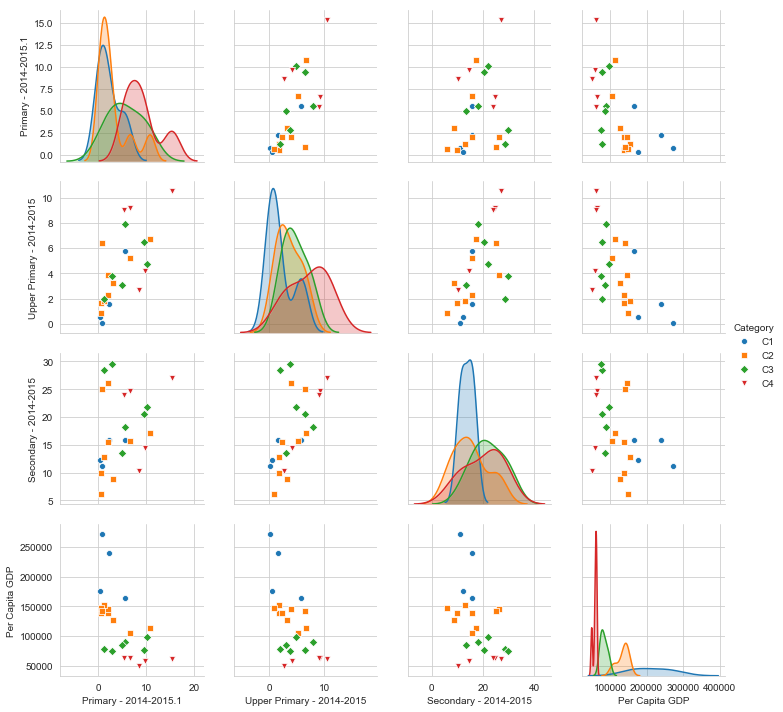

In [344]:
sns.pairplot(df_merged, hue='Category', markers=["o", "s", "D","v"])
plt.show()

### Generalised correlation between GDP per capita with Drop out rates

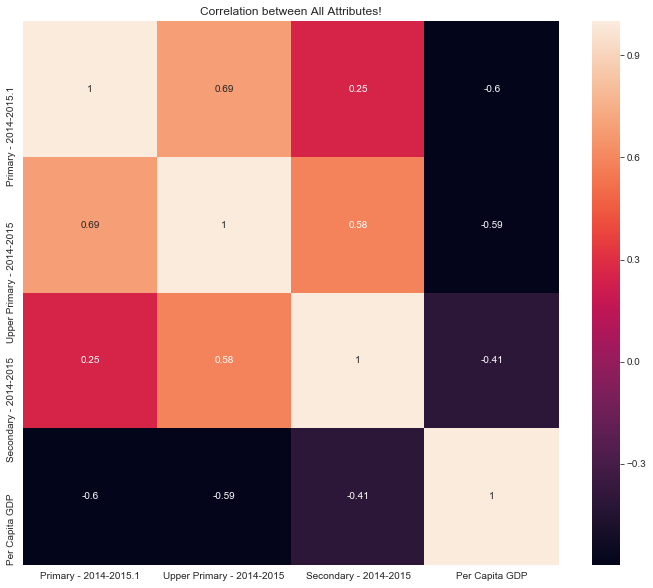

In [345]:
curr = df_merged[['State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015','Per Capita GDP']]
cor = curr.corr();
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True);
plt.title('Correlation between All Attributes!');

Here we can conclude:
* Per capita GDP is highly negatively correlated with drop outs. eg. higher drop outs lesser the GDP
* States with high per capita GDP have lower drop out rates
* C4 and C3 states have higher drop rates

#### It can be seen that the increase in the drop outs numbers is decreasing the Per Capita GDP for that state. In such cases states should be focusing on education system of the states. States can motivate the youth to continue their studies by providing scholarships and interacting with the students directly. This will motivate the student and they will definately enjoy their studies.

#### It is no secret that children are the future of the nation/state. So government should be focusing more on the children so that they can bring a bright future to the nation and states.